# Linear Transformation aided Dimensionality Reduction for Optimizing the Classification Algorithms

Basic introduction-
Basic agenda of this notebook
Info on dataset
hopefully an index with links to specific sections

# Introduction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('cereals.csv')
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
data.isnull().sum()
data.mfr.unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [4]:
data_clnd = data[(data['potass'] != -1)]
data_clnd = data_clnd[data_clnd['sugars']!=-1]
data_clnd = data_clnd[data_clnd['carbo']!=-1]
data_clnd = data_clnd[data_clnd['fiber']!=-1]
data= data_clnd
x= data.ix[:,3:11].values
y= data.ix[:,1].values

C:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


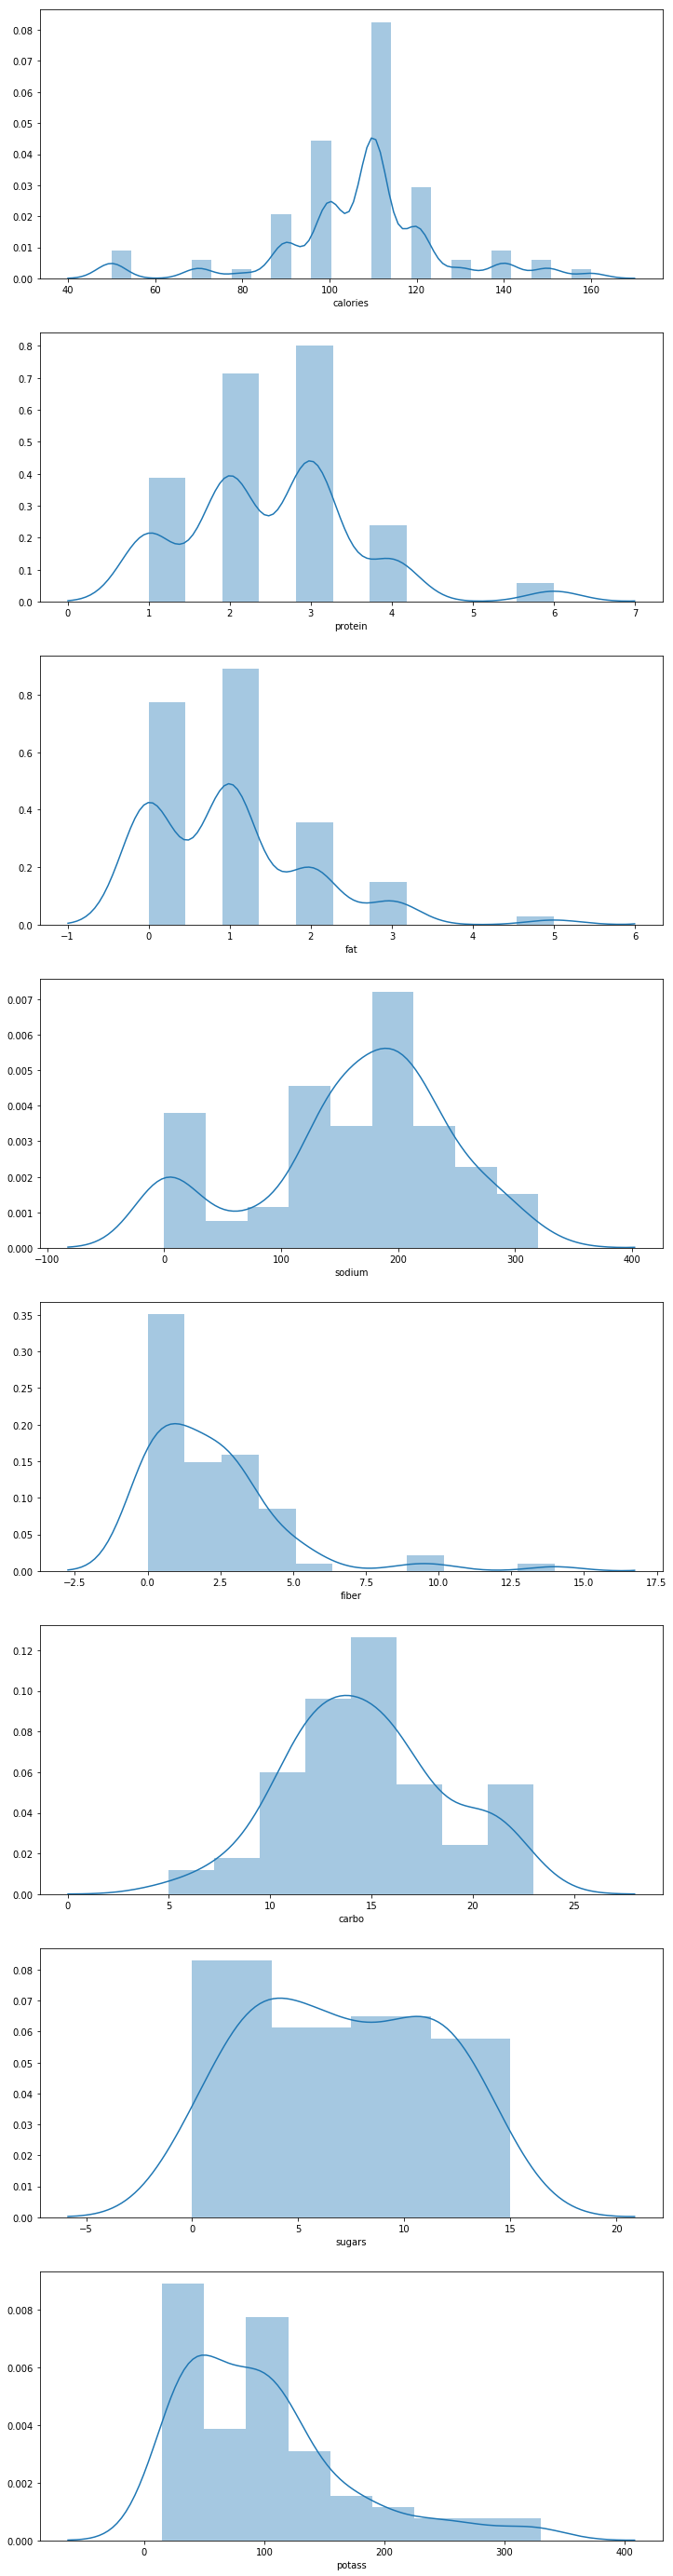

In [5]:
fig, ax = plt.subplots(8,1, figsize =(12,50))
sns.distplot(data['calories'], ax= ax[0])
sns.distplot(data['protein'], ax= ax[1])
sns.distplot(data['fat'], ax= ax[2])
sns.distplot(data['sodium'], ax= ax[3])
sns.distplot(data['fiber'], ax= ax[4])
sns.distplot(data['carbo'], ax= ax[5])
sns.distplot(data['sugars'], ax= ax[6])
sns.distplot(data['potass'], ax= ax[7])

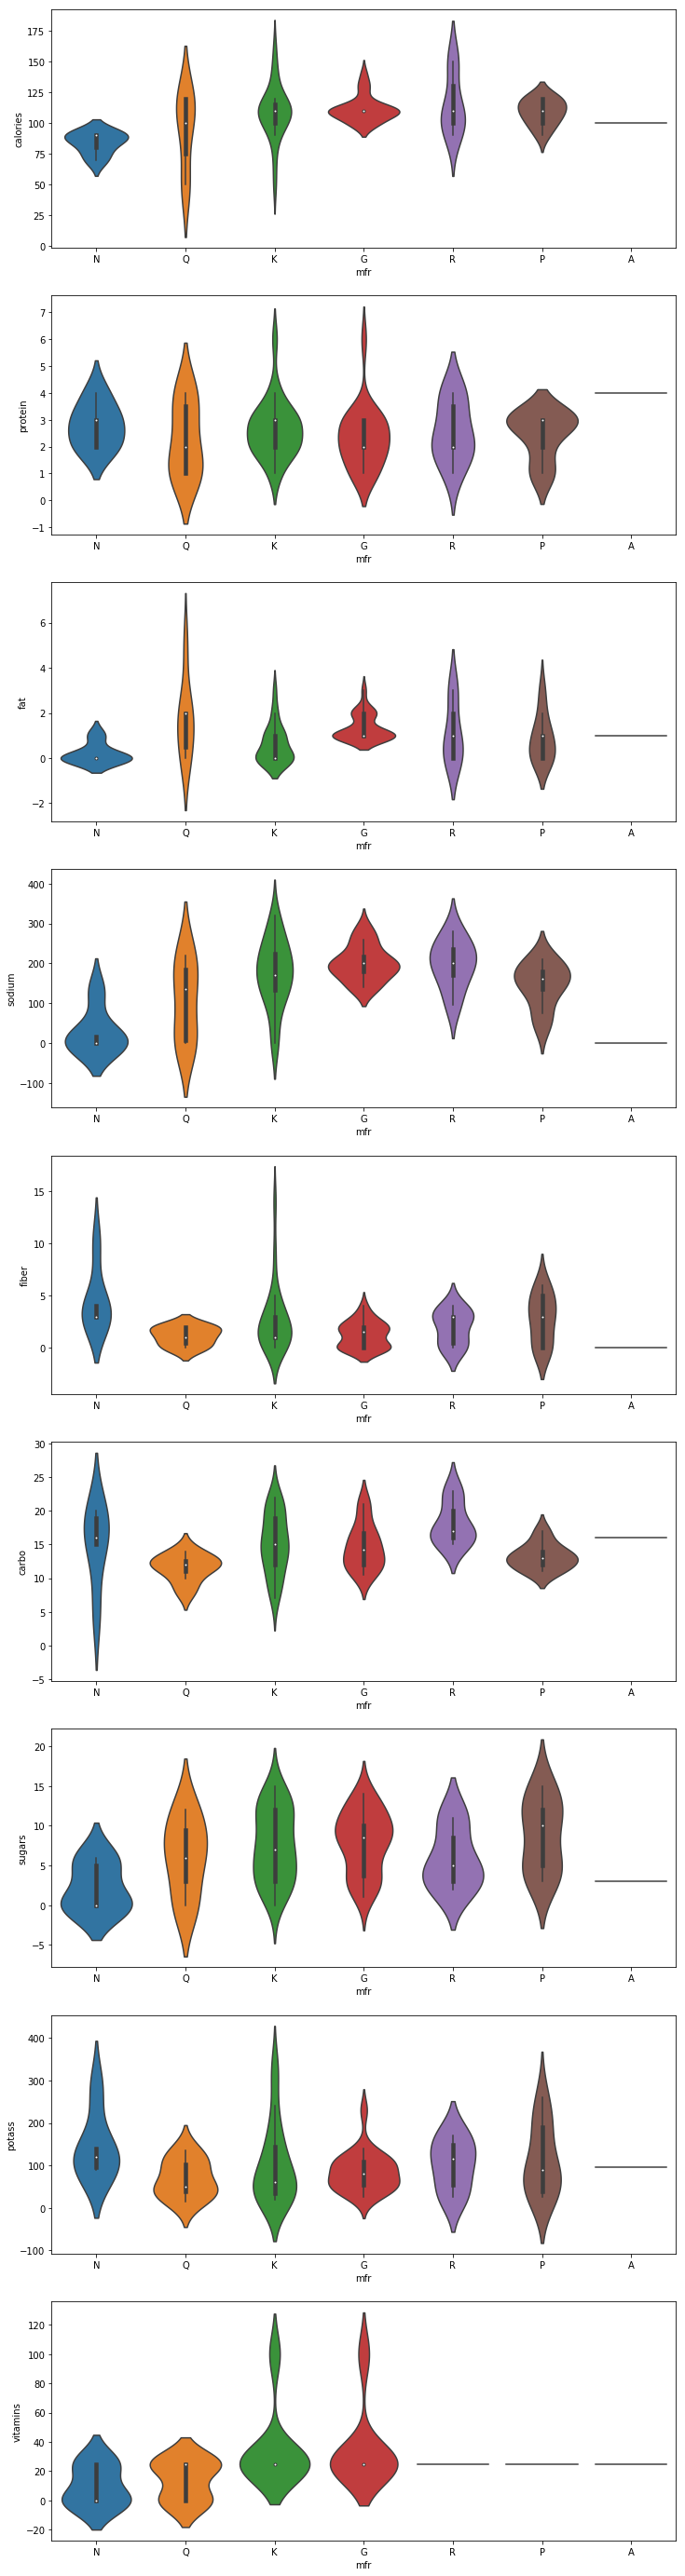

In [6]:
from matplotlib import pyplot as plt
import math

fig, ax = plt.subplots(9,1, figsize =(12,50))
sns.violinplot('mfr', 'calories', data= data, ax=ax[0])
sns.violinplot('mfr', 'protein', data= data, ax=ax[1])
sns.violinplot('mfr', 'fat', data= data, ax=ax[2])
sns.violinplot('mfr', 'sodium', data= data, ax=ax[3])
sns.violinplot('mfr', 'fiber', data= data,ax=ax[4])
sns.violinplot('mfr', 'carbo', data= data, ax=ax[5])
sns.violinplot('mfr', 'sugars', data= data, ax=ax[6])
sns.violinplot('mfr', 'potass', data= data, ax=ax[7])
sns.violinplot('mfr', 'vitamins', data= data, ax=ax[8])

Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales.

In [7]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

# Eigenvector and Eigenvalues Computation

 The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

In [8]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)

In [9]:
cov_mat.shape

(8, 8)

In [10]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals
eig_vecs.shape

(8, 8)

In [11]:
cor_mat = np.corrcoef(x.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat)
eig_vecs

array([[ 0.19766395,  0.55389484,  0.33887632, -0.09201338, -0.54224553,
         0.26662672,  0.39739999,  0.08819906],
       [-0.41265526,  0.01141024,  0.41716601, -0.32873277,  0.13906876,
         0.00928093,  0.10075484, -0.71966308],
       [-0.1047969 ,  0.52839754,  0.0833108 , -0.47783869,  0.27348573,
        -0.01692399, -0.55044632,  0.31059802],
       [ 0.13892811,  0.1025784 ,  0.53175151,  0.64822569, -0.01803383,
        -0.01780946, -0.49718823, -0.13921889],
       [-0.57303667, -0.04828089,  0.06706452,  0.25260052,  0.20297155,
         0.66954005,  0.11149445,  0.31477123],
       [ 0.32387288, -0.2441833 ,  0.56051766, -0.13670047,  0.49870235,
        -0.11546881,  0.35168797,  0.34189516],
       [ 0.08912426,  0.57342501, -0.28993086,  0.34835504,  0.53720764,
        -0.09961096,  0.33300458, -0.22005235],
       [-0.56493663,  0.1121216 ,  0.13673847,  0.17634246, -0.18170435,
        -0.67578191,  0.18635163,  0.30668663]])

Singular value Decomposition

In [12]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.19766395, -0.55389484,  0.33887632,  0.09201338, -0.39739999,
         0.08819906, -0.26662672,  0.54224553],
       [ 0.41265526, -0.01141024,  0.41716601,  0.32873277, -0.10075484,
        -0.71966308, -0.00928093, -0.13906876],
       [ 0.1047969 , -0.52839754,  0.0833108 ,  0.47783869,  0.55044632,
         0.31059802,  0.01692399, -0.27348573],
       [-0.13892811, -0.1025784 ,  0.53175151, -0.64822569,  0.49718823,
        -0.13921889,  0.01780946,  0.01803383],
       [ 0.57303667,  0.04828089,  0.06706452, -0.25260052, -0.11149445,
         0.31477123, -0.66954005, -0.20297155],
       [-0.32387288,  0.2441833 ,  0.56051766,  0.13670047, -0.35168797,
         0.34189516,  0.11546881, -0.49870235],
       [-0.08912426, -0.57342501, -0.28993086, -0.34835504, -0.33300458,
        -0.22005235,  0.09961096, -0.53720764],
       [ 0.56493663, -0.1121216 ,  0.13673847, -0.17634246, -0.18635163,
         0.30668663,  0.67578191,  0.18170435]])

Sorting Eigenpairs

In [13]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything OK')

Everything OK


Sort the eigenvectors according to their eigen values

In [14]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse = True)

print('Eigenvalues in Descending Order:')
for i in eig_pairs:
        print(i[0])

Eigenvalues in Descending Order:
2.62804258689
2.02075990555
1.50489714084
0.863847482742
0.535299914929
0.369110974612
0.0589239643778
0.0191180300605



After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [15]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

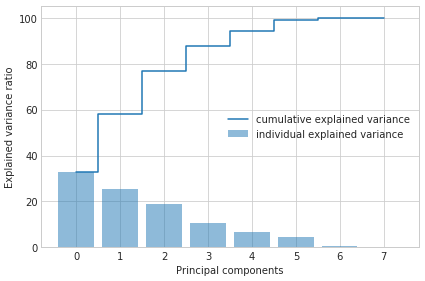

In [16]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(8), var_exp, alpha=0.5, align='center',label='individual explained variance')
    plt.step(range(8), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The plot above clearly shows that most of the variance (80% of the variance to be precise) can be explained by the first three principal component alone.other Principal components can safely be dropped without losing to much information. Together, the first 7 principal components contain 95.8% of the information.

Projection Matrix

It’s about time to get to the really interesting part: The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. Although, the name “projection matrix” has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W.

In [17]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(8,1),
                      eig_pairs[1][1].reshape(8,1),
                     eig_pairs[2][1].reshape(8,1),
                     ))
                     
                      

In this last step we will use the 4×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation
Y=X×W, where Y is a 150×2 matrix of our transformed samples.

In [18]:
Y = X_std.dot(matrix_w)
Y.shape

(74, 3)

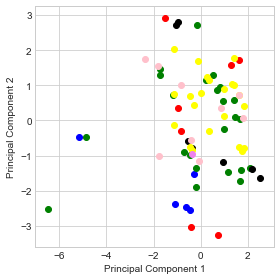

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(4, 4))
    for lab, col in zip(('N', 'Q', 'K', 'R', 'G', 'P', 'A'),
                        ('blue', 'red', 'green', 'black', 'yellow', 'pink','violet')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    #plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()